In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("/Users/hajiaga/Downloads/titanic/train.csv")
test = pd.read_csv("/Users/hajiaga/Downloads/titanic/test.csv")
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
data = pd.concat([train,test],axis = 0)
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)


In [76]:
def detect_outliers(data,col):
    Q1 = data[col].quantile(0.05)
    Q2 = data[col].quantile(0.95)
    IQR = Q2-Q1
    lower_bound = Q1-IQR*1.5
    higher_bound = Q2+IQR*1.5
    data.drop(data[data[col]>higher_bound].index ,axis =0, inplace=True)
    data.drop(data[data[col]<lower_bound].index , axis = 0, inplace=True)

In [77]:
num_cols = data.select_dtypes("number").columns

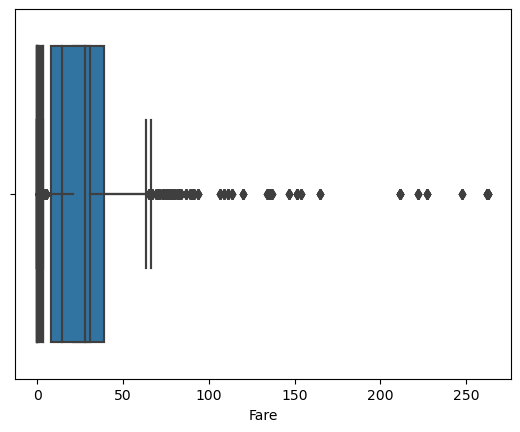

In [79]:
for i in num_cols:
    sns.boxplot(data = data, x = i)
    detect_outliers(data,i)
    sns.boxplot(data = data, x = i)
# I used this code to look at my outlier detecter's impoct on my data ,but then deleted because it will be a big output